In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [72]:
df = pd.read_excel('cars.xlsx', index_col=0)
df.drop_duplicates(inplace=True)
df.head()

,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,Acura,Integra,2025,Base,"$32,400",NaN,"$32,400",Midsize,Hatchback,I4,Turbocharged,FWD,automatic,200 hp @ 6000 rpm,192 ft-lbs. @ 1800 rpm,37 mpg
1,Acura,Integra,2025,Base w/A-Spec Package,"$34,400",NaN,"$34,400",Midsize,Hatchback,I4,Turbocharged,FWD,automatic,200 hp @ 6000 rpm,192 ft-lbs. @ 1800 rpm,36 mpg
2,Acura,Integra,2025,Base w/A-Spec and Technology Packages,"$37,400",NaN,"$37,400",Midsize,Hatchback,I4,Turbocharged,FWD,manual,200 hp @ 6000 rpm,192 ft-lbs. @ 1800 rpm,36 mpg
3,Acura,Integra,2025,Base w/A-Spec and Technology Packages,"$37,400",NaN,"$37,400",Midsize,Hatchback,I4,Turbocharged,FWD,automatic,200 hp @ 6000 rpm,192 ft-lbs. @ 1800 rpm,36 mpg
4,Acura,MDX,2025,Base,"$50,900",NaN,"$50,900",Large,SUV,V6,Naturally Aspirated,FWD,automatic,290 hp @ 6200 rpm,267 ft-lbs. @ 4700 rpm,NaN


In [73]:
# clean up horsepower "x hp @ y rpm" -> x, y
def clean_hp(text):
    text = str(text).split(' @ ')
    hp = text[0]
    if hp == 'nan':
        return 0
    return int(hp.split()[0])
    
def clean_hp_rpm(text):
    text = str(text).split(' @ ')
    if len(text) > 1:
        rpm = text[1]
        if rpm != 'nan':
            return int(rpm.split()[0])
    return 0

def clean_torque(text):
    text = str(text).split(' @ ')
    tq = text[0]
    if tq == 'nan':
        return 0
    return int(tq.split()[0])

def clean_torque_rpm(text):
    text = str(text).split(' @ ')
    if len(text) > 1:
        rpm = text[1]
        if rpm != 'nan':
            return int(rpm.split()[0])
    return 0
    
df['HP'] = df['Horsepower'].apply(clean_hp)
df['HPrpm'] = df['Horsepower'].apply(clean_hp_rpm)
df['TQ'] = df['Torque'].apply(clean_torque).apply(lambda x: x*1.3558)
df['TQrpm'] = df['Torque'].apply(clean_torque_rpm)
df.drop(['Horsepower', 'Torque'], axis=1, inplace=True)
df.head()

,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Highway Fuel Economy,HP,HPrpm,TQ,TQrpm
0,Acura,Integra,2025,Base,"$32,400",NaN,"$32,400",Midsize,Hatchback,I4,Turbocharged,FWD,automatic,37 mpg,200,6000,260.3136,1800
1,Acura,Integra,2025,Base w/A-Spec Package,"$34,400",NaN,"$34,400",Midsize,Hatchback,I4,Turbocharged,FWD,automatic,36 mpg,200,6000,260.3136,1800
2,Acura,Integra,2025,Base w/A-Spec and Technology Packages,"$37,400",NaN,"$37,400",Midsize,Hatchback,I4,Turbocharged,FWD,manual,36 mpg,200,6000,260.3136,1800
3,Acura,Integra,2025,Base w/A-Spec and Technology Packages,"$37,400",NaN,"$37,400",Midsize,Hatchback,I4,Turbocharged,FWD,automatic,36 mpg,200,6000,260.3136,1800
4,Acura,MDX,2025,Base,"$50,900",NaN,"$50,900",Large,SUV,V6,Naturally Aspirated,FWD,automatic,NaN,290,6200,361.9986,4700


In [96]:
i4 = df[df['Cylinders'] == 'I4']
i6 = df[df['Cylinders'] == 'I6']
v6 = df[df['Cylinders'] == 'V6']
v8 = df[df['Cylinders'] == 'V8']
e = df[(df['Cylinders'].isnull()) & (df['Engine Aspiration'] == 'Electric Motor')]
i4.head()

,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Highway Fuel Economy,HP,HPrpm,TQ,TQrpm
0,Acura,Integra,2025,Base,"$32,400",NaN,"$32,400",Midsize,Hatchback,I4,Turbocharged,FWD,automatic,37 mpg,200,6000,260.3136,1800
1,Acura,Integra,2025,Base w/A-Spec Package,"$34,400",NaN,"$34,400",Midsize,Hatchback,I4,Turbocharged,FWD,automatic,36 mpg,200,6000,260.3136,1800
2,Acura,Integra,2025,Base w/A-Spec and Technology Packages,"$37,400",NaN,"$37,400",Midsize,Hatchback,I4,Turbocharged,FWD,manual,36 mpg,200,6000,260.3136,1800
3,Acura,Integra,2025,Base w/A-Spec and Technology Packages,"$37,400",NaN,"$37,400",Midsize,Hatchback,I4,Turbocharged,FWD,automatic,36 mpg,200,6000,260.3136,1800
12,Alfa Romeo,Giulia,2025,Base,"$43,995","$41,795","$43,995",Midsize,Sedan,I4,Turbocharged,RWD,automatic,33 mpg,280,5200,414.8748,2000


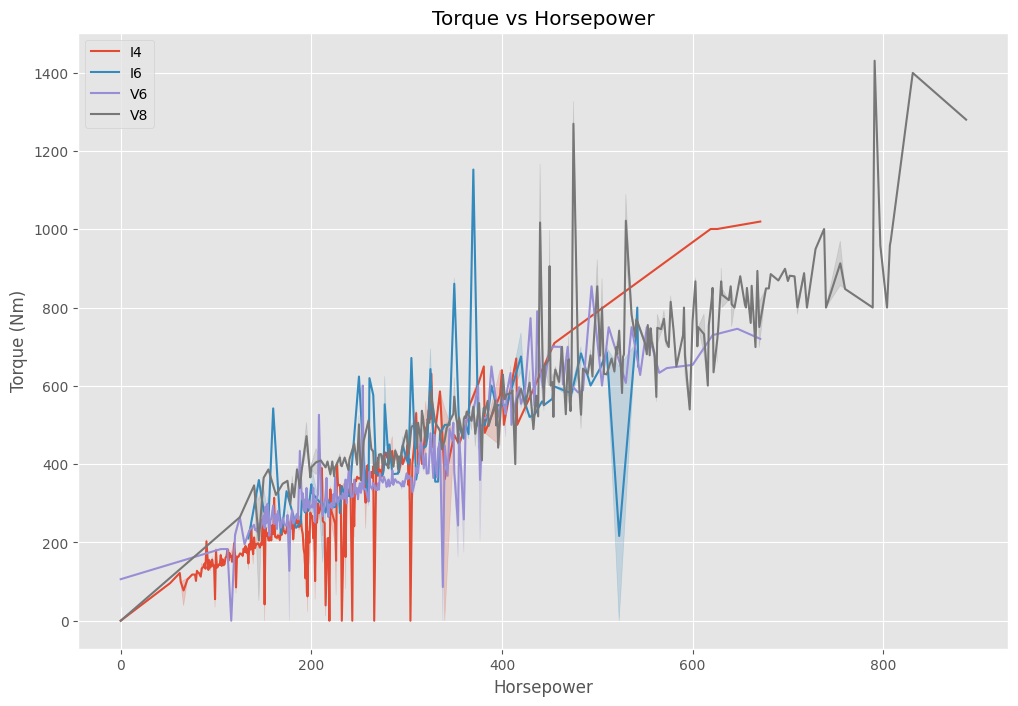

In [75]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='HP', y='TQ', data=i4, label='I4')
sns.lineplot(x='HP', y='TQ', data=i6, label='I6')
sns.lineplot(x='HP', y='TQ', data=v6, label='V6')
sns.lineplot(x='HP', y='TQ', data=v8, label='V8')
# sns.lineplot(x='HP', y='TQ', data=e, label='Electric')
plt.xlabel('Horsepower')
plt.ylabel('Torque (Nm)')
plt.title('Torque vs Horsepower')
plt.show()

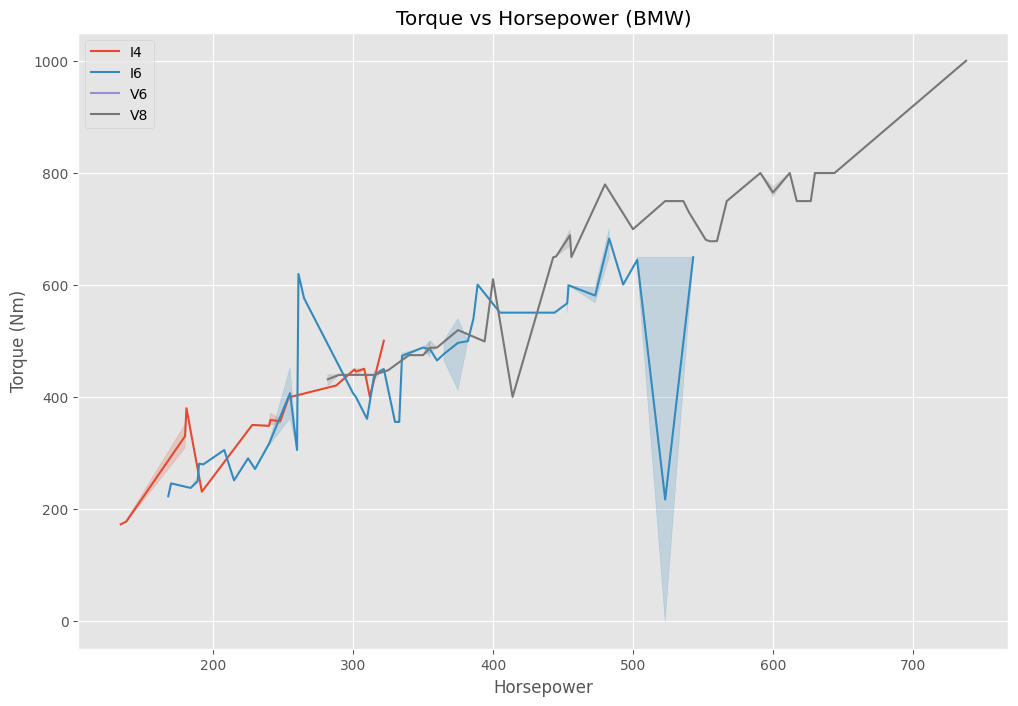

In [76]:
bmw_i4 = i4[i4['Make'] == 'BMW']
bmw_i6 = i6[i6['Make'] == 'BMW']
bmw_v6 = v6[v6['Make'] == 'BMW']
bmw_v8 = v8[v8['Make'] == 'BMW']
bmw_e = e[e['Make'] == 'BMW']

plt.figure(figsize=(12, 8))
sns.lineplot(x='HP', y='TQ', data=bmw_i4, label='I4')
sns.lineplot(x='HP', y='TQ', data=bmw_i6, label='I6')
sns.lineplot(x='HP', y='TQ', data=bmw_v6, label='V6')
sns.lineplot(x='HP', y='TQ', data=bmw_v8, label='V8')
# sns.lineplot(x='HP', y='TQ', data=bmw_e, label='Electric')
plt.xlabel('Horsepower')
plt.ylabel('Torque (Nm)')
plt.title('Torque vs Horsepower (BMW)')
plt.show()

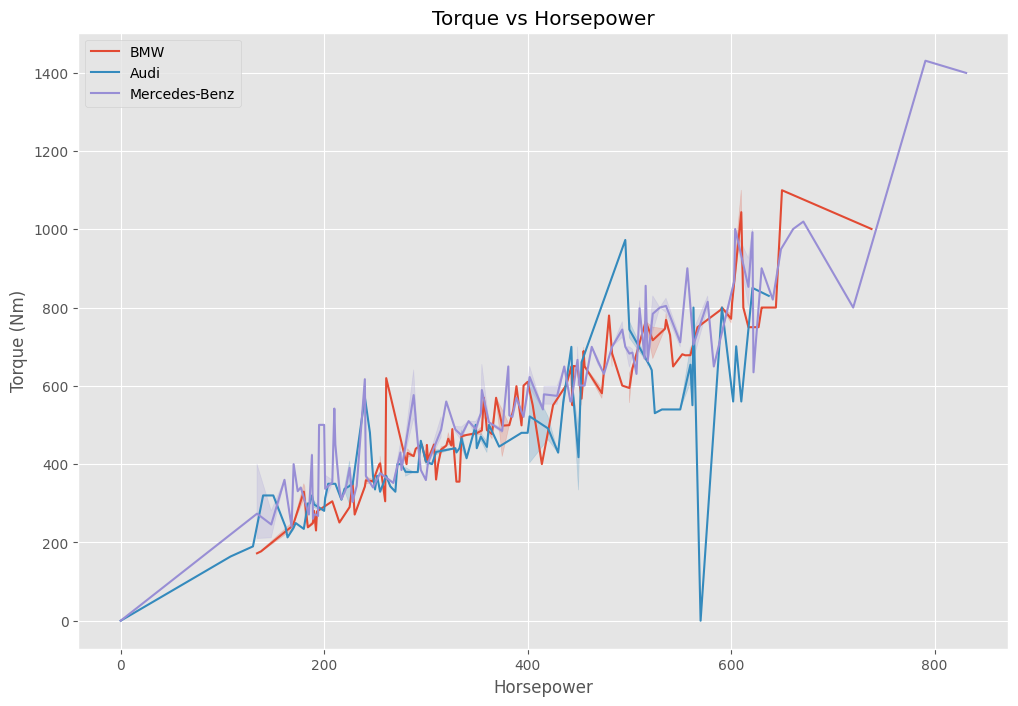

In [77]:
bmw_all = df[df['Make'] == 'BMW']
audi_all = df[df['Make'] == 'Audi']
mercedes_all = df[df['Make'] == 'Mercedes-Benz']

plt.figure(figsize=(12, 8))
sns.lineplot(x='HP', y='TQ', data=bmw_all, label='BMW')
sns.lineplot(x='HP', y='TQ', data=audi_all, label='Audi')
sns.lineplot(x='HP', y='TQ', data=mercedes_all, label='Mercedes-Benz')
plt.xlabel('Horsepower')
plt.ylabel('Torque (Nm)')
plt.title('Torque vs Horsepower')
plt.show()

In [78]:
top_bmw = bmw_all.sort_values('HP', ascending=False).head(1)
top_audi = audi_all.sort_values('HP', ascending=False).head(1)
top_mercedes = mercedes_all.sort_values('HP', ascending=False).head(1)
top_df = pd.concat([top_bmw, top_audi, top_mercedes]).sort_values('HP', ascending=False)
top_df

,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Highway Fuel Economy,HP,HPrpm,TQ,TQrpm
8937,Mercedes-Benz,AMG GT,2024,63 S E PERFORMANCE,"$194,900",NaN,"$194,900",Large,Sedan,V8,Twin-Turbo,AWD,automatic,NaN,831,5500,1399.1856,2500
3218,BMW,XM,2024,Label Red,"$185,000","$172,550","$185,000",Large,SUV,V8,Twin-Turbo,AWD,automatic,17 mpg,738,0,1000.5804,0
2502,Audi,RS e-tron GT,2024,Base,"$147,100","$138,274","$147,100",Large,Sedan,NaN,Electric Motor,AWD,automatic,85 mpg,637,0,829.7496,0


In [80]:
top_car = df.sort_values('HP', ascending=False).head(1)
top_car

,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Highway Fuel Economy,HP,HPrpm,TQ,TQrpm
32040,Lucid,Air,2022,Dream Edition Performance,"$169,000",NaN,"$169,000",Large,Sedan,NaN,Electric Motor,AWD,automatic,111 mpg,1111,0,1389.695,0


In [88]:
drivetrain = df['Drivetrain'].value_counts()
drivetrain

Drivetrain
RWD    19397
FWD    19214
AWD    13743
4WD    12378
Name: count, dtype: int64

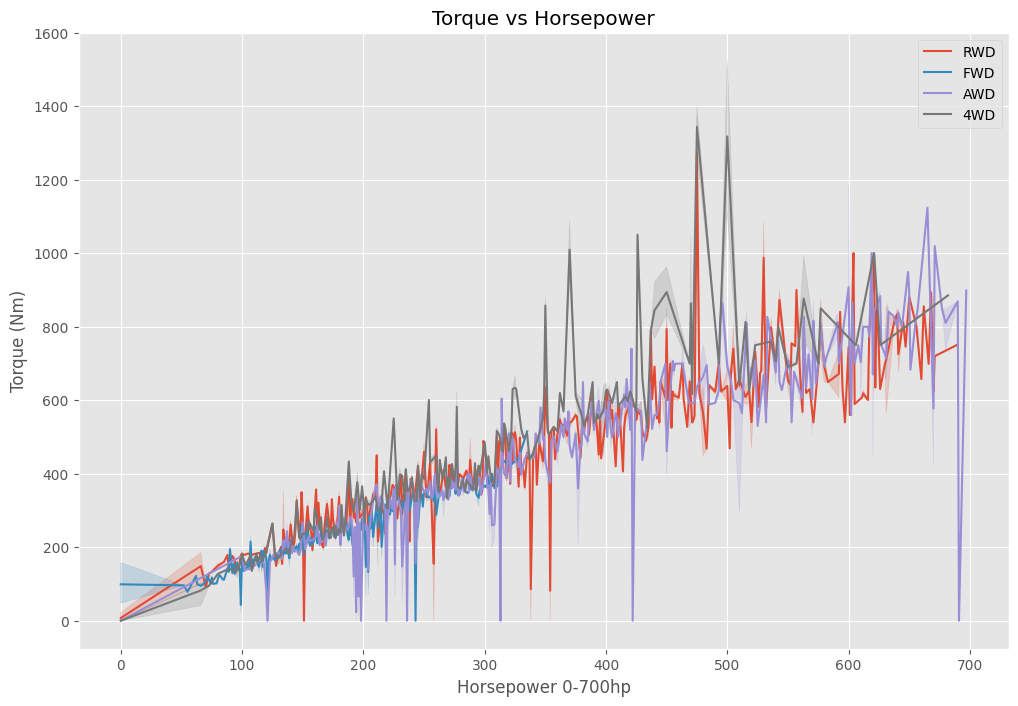

In [95]:
rwd = df[(df['Drivetrain'] == 'RWD') & (df['HP'] < 700)]
fwd = df[(df['Drivetrain'] == 'FWD') & (df['HP'] < 700)]
awd = df[(df['Drivetrain'] == 'AWD') & (df['HP'] < 700)]
w4d = df[(df['Drivetrain'] == '4WD') & (df['HP'] < 700)]

plt.figure(figsize=(12, 8))
sns.lineplot(x='HP', y='TQ', data=rwd, label='RWD')
sns.lineplot(x='HP', y='TQ', data=fwd, label='FWD')
sns.lineplot(x='HP', y='TQ', data=awd, label='AWD')
sns.lineplot(x='HP', y='TQ', data=w4d, label='4WD')
plt.xlabel('Horsepower 0-700hp')
plt.ylabel('Torque (Nm)')
plt.title('Torque vs Horsepower')
plt.show()

In [90]:
fwd.sort_values('HP', ascending=False).head(1)

,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Highway Fuel Economy,HP,HPrpm,TQ,TQrpm
54542,Lincoln,Continental,2020,Reserve,"$59,870","$56,876","$52,072",Large,Sedan,V6,Twin-Turbo,FWD,automatic,27 mpg,335,5700,515.204,3500


In [115]:
v = df[df['Cylinders'].isin(['V6', 'V8'])].copy()
i = df[df['Cylinders'].isin(['I4', 'I6'])].copy()

v.loc[:, 'Cylinders'] = v['Cylinders'].apply(lambda x: int(x[1]))
i.loc[:, 'Cylinders'] = i['Cylinders'].apply(lambda x: int(x[1]))

correlation_v = v["Cylinders"].corr(v["HP"])
correlation_i = i["Cylinders"].corr(i["HP"])

print(f'Corelation Cyl -> HP:\nV:{correlation_v*100:.2f}, I:{correlation_i*100:.2f}', sep='')


Corelation Cyl -> HP:
V:49.82, I:46.56


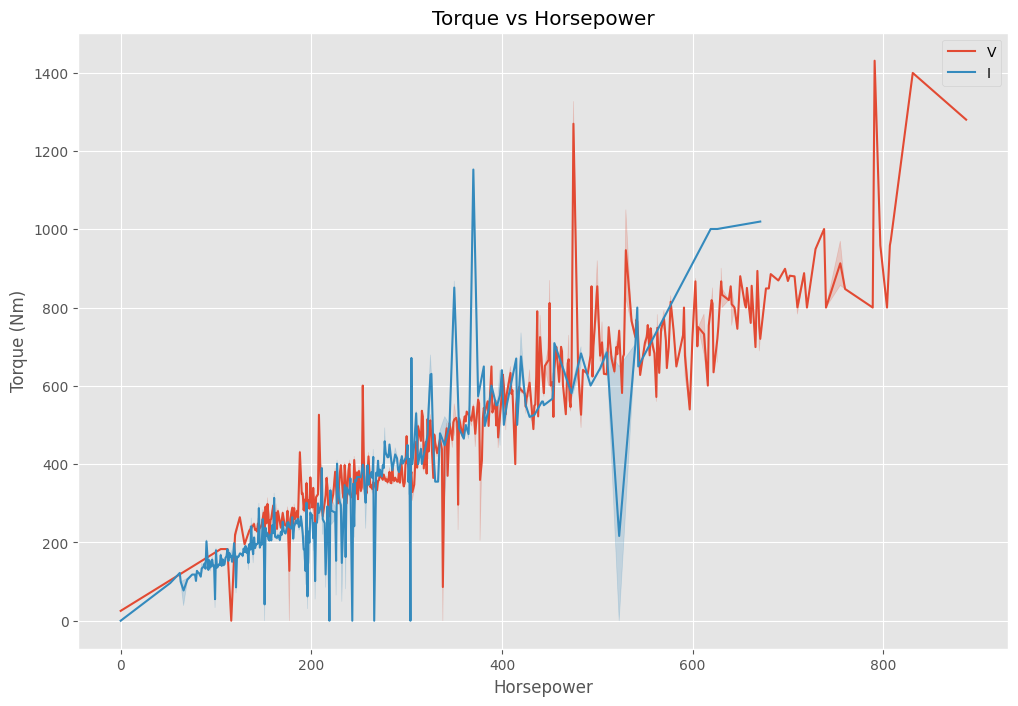

In [116]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='HP', y='TQ', data=v, label='V')
sns.lineplot(x='HP', y='TQ', data=i, label='I')
plt.xlabel('Horsepower')
plt.ylabel('Torque (Nm)')
plt.title('Torque vs Horsepower')
plt.show()

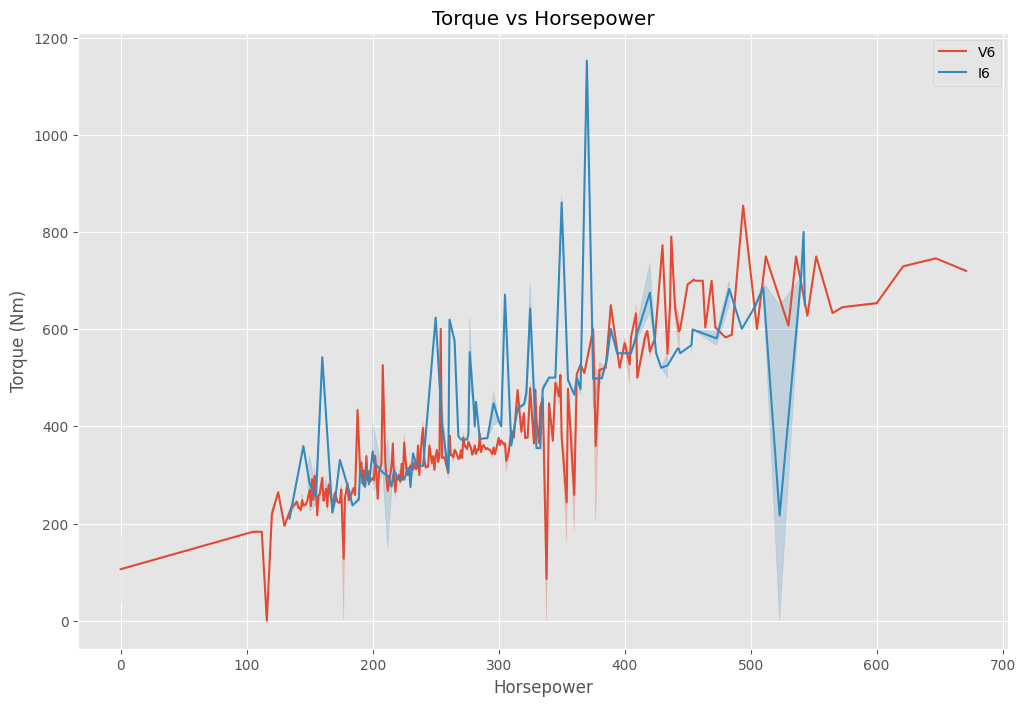

In [117]:
v6 = df[df['Cylinders'] == 'V6']
i6 = df[df['Cylinders'] == 'I6']

plt.figure(figsize=(12, 8))
sns.lineplot(x='HP', y='TQ', data=v6, label='V6')
sns.lineplot(x='HP', y='TQ', data=i6, label='I6')
plt.xlabel('Horsepower')
plt.ylabel('Torque (Nm)')
plt.title('Torque vs Horsepower')
plt.show()

In [118]:
df.describe()

,Year,HP,HPrpm,TQ,TQrpm
count,64733.000000,64733.000000,64733.000000,64733.000000,64733.000000
mean,2012.160706,266.277077,5433.495883,380.714391,3401.116942
std,8.415738,109.267421,1224.340588,247.656045,1286.135398
min,1990.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,181.000000,5200.000000,249.467200,2500.000000
50%,2013.000000,260.000000,5600.000000,356.575400,4000.000000
75%,2019.000000,320.000000,6000.000000,494.867000,4250.000000
max,2025.000000,1111.000000,13000.000000,15591.700000,7500.000000
